# ai3 for the same thing

## dependencies

In [82]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

## dataset stuff

### read the dataset

In [83]:
df = pd.read_csv('dataset.csv')
df = df.sample(frac = 1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
62,58,1,4,128,216,0,2,131,1,2.2,2,3.0,7.0,1
211,38,1,1,120,231,0,0,182,1,3.8,2,0.0,7.0,4
271,66,1,4,160,228,0,2,138,0,2.3,1,0.0,6.0,0
117,35,0,4,138,183,0,0,182,0,1.4,1,0.0,3.0,0
237,46,1,4,120,249,0,2,144,0,0.8,1,0.0,7.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,63,1,4,130,330,1,2,132,1,1.8,1,3.0,7.0,3
191,51,1,4,140,298,0,0,122,1,4.2,2,3.0,7.0,3
289,56,1,2,120,240,0,0,169,0,0.0,3,0.0,3.0,0
274,59,1,1,134,204,0,0,162,0,0.8,1,2.0,3.0,1


### train_test split

In [84]:
ratio = 0.9 # 90:10 train:test ratio
train_set = df.sample(frac=ratio)

# Dropping all those indexes from the dataframe that exists in the train_set
test_set = df.drop(train_set.index)
train_set.shape, test_set.shape

train_set
test_set

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
183,59,1,1,178,270,0,2,145,0,4.2,3,0.0,7.0,0
106,59,1,4,140,177,0,0,162,1,0.0,1,1.0,7.0,2
82,39,1,3,140,321,0,2,182,0,0.0,1,0.0,3.0,0
88,53,0,4,138,234,0,2,160,0,0.0,1,0.0,3.0,0
92,62,1,3,130,231,0,0,146,0,1.8,2,3.0,7.0,0
158,60,1,4,140,293,0,2,170,0,1.2,2,2.0,7.0,2
207,50,1,4,144,200,0,2,126,1,0.9,2,0.0,7.0,3
280,57,1,4,110,335,0,0,143,1,3.0,2,1.0,7.0,2
216,46,0,2,105,204,0,0,172,0,0.0,1,0.0,3.0,0
114,62,0,3,130,263,0,0,97,0,1.2,2,1.0,7.0,2


### formating

In [85]:
# import training dataset

# Clean column names
train_set.columns = train_set.columns.str.strip()

# Handle missing values represented by '?'
train_set = train_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
train_set = train_set.dropna()
train_set = train_set.astype(float)

# Split features and labels
X = train_set.drop("diagnosis", axis=1)
y = train_set["diagnosis"]

# normalise featuress from minmax scaling (sklearn)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert to PyTorch tensors
inputs = torch.tensor(X_scaled, dtype=torch.float32)
targets = torch.tensor(y.values, dtype=torch.float32)

print(inputs.shape, targets.shape)

torch.Size([267, 13]) torch.Size([267])


In [86]:
# import testing dataset

# Clean column names
test_set.columns = test_set.columns.str.strip()

# Handle missing values represented by '?'
test_set = test_set.replace('?', np.nan)

# Convert columns to numeric, drop rows with NaNs
test_set = test_set.dropna()
test_set = test_set.astype(float)

# Use the same scaler as for training
X_scaled = scaler.transform(X)

# Split features and labels
X = test_set.drop("diagnosis", axis=1)
y = test_set["diagnosis"]

# Convert to PyTorch tensors
test_tensor = torch.tensor(X_scaled, dtype=torch.float32)
test_target = torch.tensor(y.values, dtype=torch.float32)

print(test_tensor.shape, test_target.shape)

torch.Size([267, 13]) torch.Size([30])


## ai

### parameters for layers (basically setup)

In [87]:
class SimpleNN(nn.Module): 
    def __init__(self): 
        super(SimpleNN, self).__init__() 
        self.fc1 = nn.Linear(13, 8)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(8, 1)
        
    def forward(self, x): 
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        return x  # No sigmoid here; use BCEWithLogitsLoss

model = SimpleNN()
print(model)

SimpleNN(
  (fc1): Linear(in_features=13, out_features=8, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=8, out_features=1, bias=True)
)


### training

In [88]:
#calculate error
# Use BCEWithLogitsLoss for binary classification
criterion = nn.BCEWithLogitsLoss()
optimiser = optim.SGD(model.parameters(), lr=0.01)

# Ensure targets are shape (N, 1)
targets = targets.view(-1, 1)
print(targets)

tensor([[3.],
        [2.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [3.],
        [0.],
        [0.],
        [3.],
        [0.],
        [0.],
        [3.],
        [0.],
        [0.],
        [3.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [2.],
        [2.],
        [1.],
        [1.],
        [4.],
        [0.],
        [0.],
        [4.],
        [2.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [3.],
        [0.],
        [0.],
        [0.],
        [1.],
        [3.],
        [3.],
        [3.],
        [1.],
        [3.],
        [0.],
        [0.],
        [1.],
      

In [89]:
# learning rate
lr = 0.0001

Epoch [1/5000], Loss: -1246781868865805615104.0000
Epoch [2/5000], Loss: -1259578143519537102848.0000
Epoch [3/5000], Loss: -1272505866987392466944.0000
Epoch [4/5000], Loss: -1285566165169278550016.0000
Epoch [5/5000], Loss: -1298760726915055616000.0000
Epoch [6/5000], Loss: -1312090537387142152192.0000
Epoch [7/5000], Loss: -1325557144697910067200.0000
Epoch [8/5000], Loss: -1339162096959731269632.0000
Epoch [9/5000], Loss: -1352906660810000957440.0000
Epoch [10/5000], Loss: -1366791962148625973248.0000
Epoch [11/5000], Loss: -1380820252775420002304.0000
Epoch [12/5000], Loss: -1394991814165359755264.0000
Epoch [13/5000], Loss: -1409309461068212338688.0000
Epoch [14/5000], Loss: -1423774037908907884544.0000
Epoch [15/5000], Loss: -1438386811324841590784.0000
Epoch [16/5000], Loss: -1453149751640850432000.0000
Epoch [17/5000], Loss: -1468063984756841250816.0000
Epoch [18/5000], Loss: -1483131480997651021824.0000
Epoch [19/5000], Loss: -1498353507000674942976.0000
Epoch [20/5000], Loss

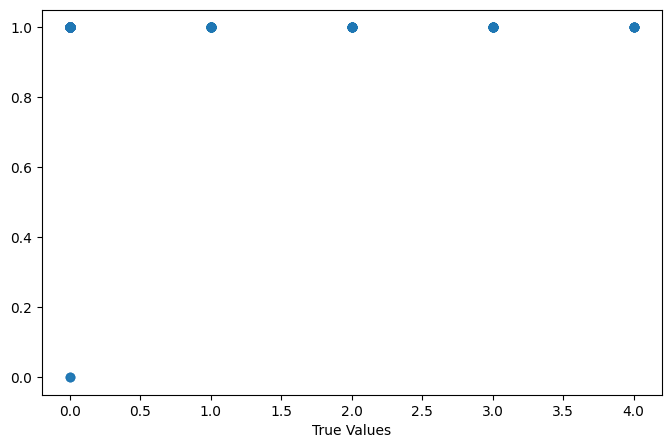

In [91]:
for epoch in range(5000):
    optimiser.zero_grad()
    outputs = model(inputs)
    loss = criterion(outputs, targets)
    if torch.isnan(loss):
        print("Loss is NaN!")
        break
    loss.backward()
    optimiser.step()
#    if (epoch + 1) % 500 == 0:
    print(f'Epoch [{epoch + 1}/5000], Loss: {loss.item():.4f}')
print(outputs)

# Evaluate on training set
with torch.no_grad():
    outputs = model(inputs)
    preds = torch.sigmoid(outputs)
    predicted_classes = (preds > 0.5).float()
    accuracy = (predicted_classes == targets).float().mean()
    print(f"Training Accuracy: {accuracy.item()*100:.2f}%")

    # Plot predictions vs. true values
    plt.figure(figsize=(8, 5))
    plt.scatter(targets.numpy(), preds.numpy(), alpha=0.6)
    plt.xlabel("True Values")


### testing

## ui